In [1]:
import sqlite3
import pandas as pd
import numpy as np
# 连接到数据库文件
conn = sqlite3.connect("../pokemmo.sqlite")
# 创建游标对象
cursor = conn.cursor()

In [2]:
# 执行查询语句
query = """
SELECT x_coords,y_coords,map_number_tuple FROM general_status
where map_number_tuple = '(2, 0, 120)'
or map_number_tuple = '(2, 0, 133)'
or map_number_tuple = '(2, 1, 109)'
"""
cursor.execute(query)

# 获取查询结果
results = cursor.fetchall()
df = pd.DataFrame(results, columns=['x_coords', 'y_coords', 'map_number_tuple'])
df.head()



,x_coords,y_coords,map_number_tuple
0,425,174,"(2, 0, 120)"
1,425,174,"(2, 0, 120)"
2,425,174,"(2, 0, 120)"
3,426,174,"(2, 0, 120)"
4,427,174,"(2, 0, 120)"


In [3]:
numeric_cols = ['x_coords', 'y_coords', 'map_number_tuple']
statistics = df[numeric_cols].describe()
print(statistics)

          x_coords     y_coords
count  4820.000000  4820.000000
mean    372.613278   141.197095
std     165.402062    61.943402
min       0.000000     2.000000
25%     425.000000   150.000000
50%     433.000000   173.000000
75%     462.000000   175.000000
max     498.000000   179.000000


增加offset

In [30]:
df['new_x']=df['x_coords']
df['new_y'] = df['y_coords']

df['new_x'] = df.apply(lambda row: round((row['new_x'])*5/17)+448 if row['map_number_tuple'] == '(2, 0, 133)' else row['new_x'], axis=1)
df['new_y'] = df.apply(lambda row: row['new_y'] +169 if row['map_number_tuple'] == '(2, 0, 133)' else row['new_y'], axis=1)

# df['new_x'] = df.apply(lambda row: row['new_x'] +55 if row['map_number_tuple'] == '(0, 0, 24)' else row['new_x'], axis=1)
# df['new_y'] = df.apply(lambda row: row['new_y'] +15 if row['map_number_tuple'] == '(0, 0, 24)' else row['new_y'], axis=1)

# df['new_x'] = df.apply(lambda row: row['new_x'] +48 if row['map_number_tuple'] == '(0, 33, 3)' else row['new_x'], axis=1)
# df['new_y'] = df.apply(lambda row: row['new_y'] +10 if row['map_number_tuple'] == '(0, 33, 3)' else row['new_y'], axis=1)


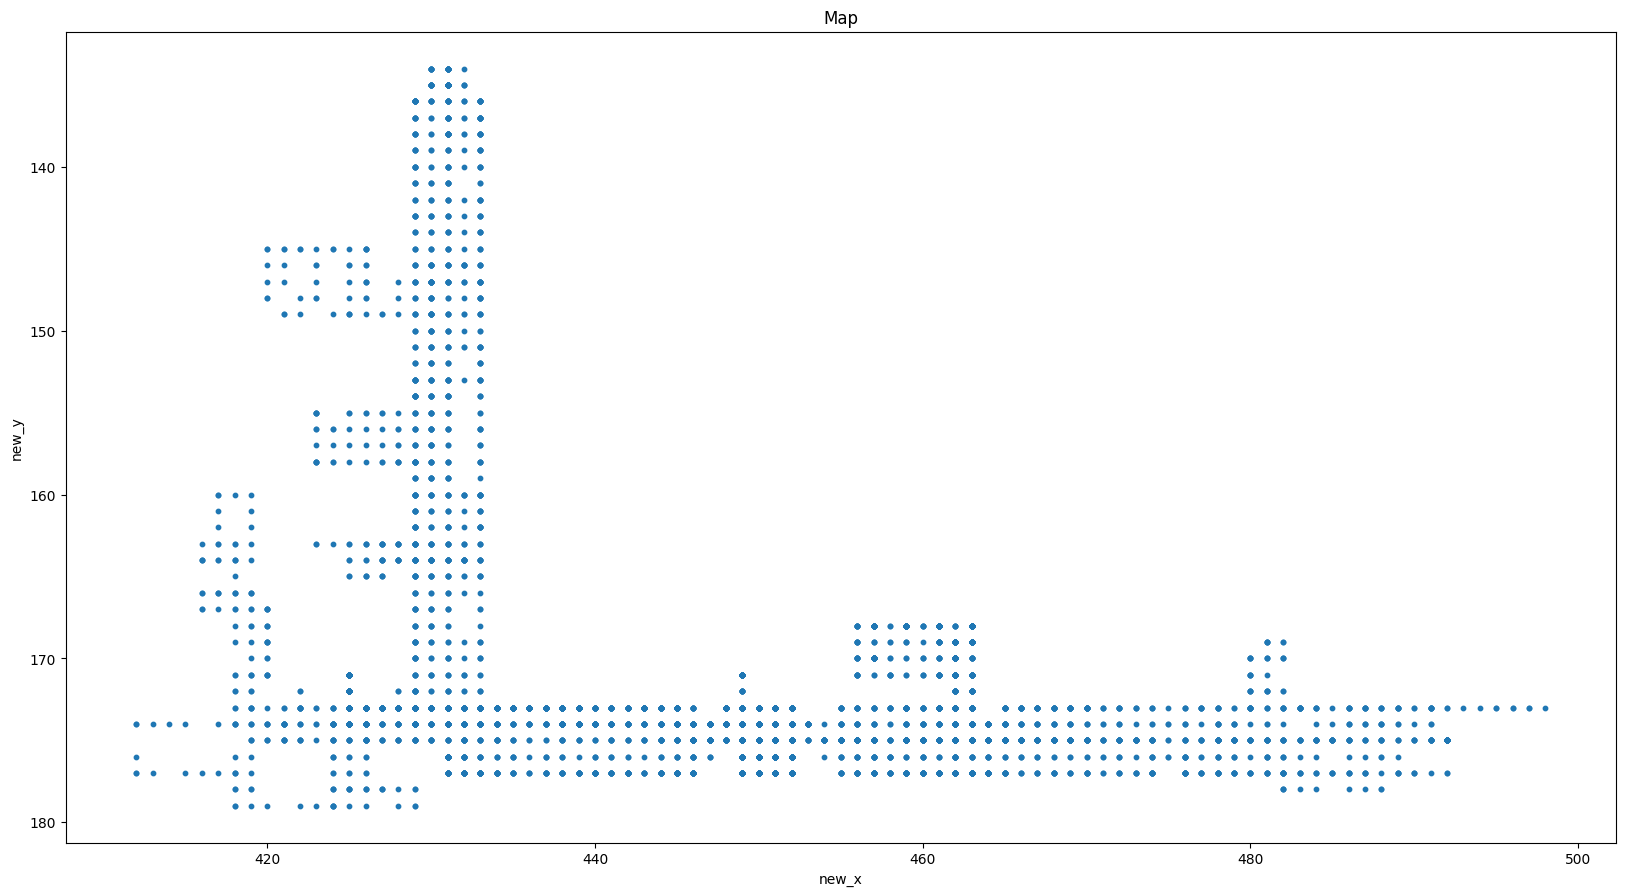

In [31]:
import matplotlib.pyplot as plt

# 创建图形对象和坐标轴
fig, ax = plt.subplots(figsize=(20, 20))  # 调整图形大小

# 绘制散点图，调整坐标点大小
ax.scatter(df['new_x'], df['new_y'], s=10)  # 调整坐标点大小

# 反转 y 轴
ax.invert_yaxis()

# 设置坐标轴标签
ax.set_xlabel('new_x')
ax.set_ylabel('new_y')

# 设置标题
ax.set_title('Map')

# 调整坐标轴比例相同
ax.set_aspect('equal')

# 显示图形
plt.show()


In [75]:
# 将坐标点四舍五入到最近的整数
df = df.round(0)
# 创建一个空的DataFrame，它的行和列分别代表y和x的值
grid_df = pd.DataFrame(index=np.arange(int(df['new_y'].min()), int(df['new_y'].max()) + 1),
                       columns=np.arange(int(df['new_x'].min()), int(df['new_x'].max()) + 1))

# 将存在的坐标点填充为1
for _, row in df.iterrows():
    grid_df.at[int(row['new_y']), int(row['new_x'])] = 1

# # 反转y轴
#grid_df = grid_df.iloc[::-1]

# 导出到Excel
grid_df.to_excel("../asserts/coords_tracking/Opelucid City Sp Attack coordinates.xlsx")

In [76]:
import sqlite3
import pandas as pd
import numpy as np
df=pd.read_excel("../asserts/coords_tracking/Opelucid City Sp Attack coordinates.xlsx", index_col=0)
# 先重置索引，这样行标签就变成一列
df = df.reset_index()
df

,index,412,413,414,415,416,417,418,419,420,...,489,490,491,492,493,494,495,496,497,498
0,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# 使用 melt，这会把所有列都转成两列，一列是原来的列名（变量），一列是对应的值
df_melted = df.melt(id_vars='index', var_name='x_coords', value_name='mark')
df_melted

,index,x_coords,mark
0,134,412,NaN
1,135,412,NaN
2,136,412,NaN
3,137,412,NaN
4,138,412,NaN
...,...,...,...
3997,175,498,NaN
3998,176,498,NaN
3999,177,498,NaN
4000,178,498,NaN


In [78]:
# 修改列名
df_melted.rename(columns={'index': 'y_coords'}, inplace=True)
df_melted

,y_coords,x_coords,mark
0,134,412,NaN
1,135,412,NaN
2,136,412,NaN
3,137,412,NaN
4,138,412,NaN
...,...,...,...
3997,175,498,NaN
3998,176,498,NaN
3999,177,498,NaN
4000,178,498,NaN


In [79]:
# 过滤掉 mark 列为 NaN 的行
df_melted = df_melted.dropna(subset=['mark'])
df_melted

,y_coords,x_coords,mark
40,174,412,1.0
42,176,412,1.0
43,177,412,1.0
86,174,413,1.0
89,177,413,1.0
...,...,...,...
3811,173,494,1.0
3857,173,495,1.0
3903,173,496,1.0
3949,173,497,1.0


In [80]:
# 把值为PC_IN的单元格的值改成112
df_melted.loc[df_melted['mark'] == 'pc_in', 'mark'] = 112

df_melted.loc[df_melted['mark'] == 'farming', 'mark'] = 66
# 所有float类型的值转成int
df_melted = df_melted.astype({'mark': 'int'})

df_melted.reset_index(drop=True, inplace=True)

# 输出查看结果
print(df_melted)

     y_coords x_coords  mark
0         174      412     1
1         176      412     1
2         177      412     1
3         174      413     1
4         177      413     1
..        ...      ...   ...
687       173      494     1
688       173      495     1
689       173      496     1
690       173      497     1
691       173      498     1

[692 rows x 3 columns]


In [81]:
df_melted.to_csv('../asserts/coords_tracking/Opelucid_City_Sp_Attack_coords_tracking.csv')

In [49]:
# 关闭游标和连接
cursor.close()
conn.close()